In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
path = 'yelp_data/sent_text.csv'

original = pd.read_csv(path)
original.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
path = 'yelp_data/sent_text_clean.csv'

clean = pd.read_csv(path)
clean.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
def valscore(comp):
    if comp >= 0.05:
        return 'positive'
    elif comp <= -0.05:
        return 'negative'
    elif comp >-0.05 and comp <0.05:
        return 'neutral'
    else:
        return 'unknown'

In [6]:
%%time
original['sentiment_value'] = original['compound'].apply(valscore)

CPU times: user 15.6 ms, sys: 15.6 ms, total: 31.2 ms
Wall time: 27.5 ms


In [7]:
%%time
clean['sentiment_value'] = clean['compound'].apply(valscore)

CPU times: user 46.9 ms, sys: 0 ns, total: 46.9 ms
Wall time: 23.1 ms


In [8]:
original.sentiment_value.value_counts()

positive    40742
negative    14478
neutral      8786
Name: sentiment_value, dtype: int64

In [9]:
clean.sentiment_value.value_counts()

positive    45497
negative    17327
neutral      1182
Name: sentiment_value, dtype: int64

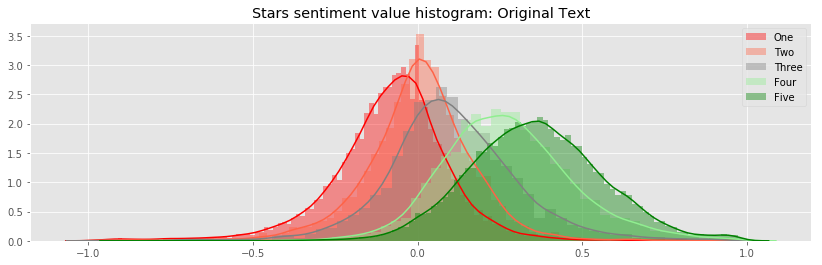

In [10]:
plt.figure(figsize=(14,4))
sns.distplot(original[original.stars==1]['compound'],bins='auto',label='One',color='red',hist=True)
sns.distplot(original[original.stars==2]['compound'],bins='auto',label='Two',color='tomato',hist=True)
sns.distplot(original[original.stars==3]['compound'],bins='auto',label='Three',color='gray',hist=True)
sns.distplot(original[original.stars==4]['compound'],bins='auto',label='Four',color='lightgreen',hist=True)
sns.distplot(original[original.stars==5]['compound'],bins='auto',label='Five',color='green',hist=True)
plt.xlabel('')
plt.legend()
plt.title('Stars sentiment value histogram: Original Text')
plt.show()

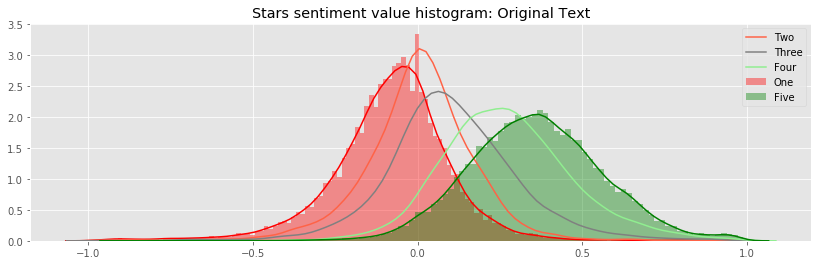

In [11]:
plt.figure(figsize=(14,4))
sns.distplot(original[original.stars==1]['compound'],bins='auto',label='One',color='red',hist=True)
sns.distplot(original[original.stars==2]['compound'],bins='auto',label='Two',color='tomato',hist=False)
sns.distplot(original[original.stars==3]['compound'],bins='auto',label='Three',color='gray',hist=False)
sns.distplot(original[original.stars==4]['compound'],bins='auto',label='Four',color='lightgreen',hist=False)
sns.distplot(original[original.stars==5]['compound'],bins='auto',label='Five',color='green',hist=True)
plt.xlabel('')
plt.legend()
plt.title('Stars sentiment value histogram: Original Text')
plt.show()

In [12]:
clean.head()

,review_id,stars,clean_text,compound,neg,neu,pos,sentiment_value
0,TNNkSmMfshsD3G60jTNjDA,1,please stay away place bad care imaginable sta...,0.551,0.189,0.566,0.245,positive
1,v-iKdstPdCxJr8zV1ZMdrw,5,husband patient dr byrne last year half last m...,-0.468,0.155,0.710,0.134,negative
2,BmNDRCV9_NzQ_KCChyfdEw,4,dr byrne great doctor great bed side manner ex...,0.897,0.103,0.581,0.316,positive
3,t_TKVMxKFYm9Hl-TIO7UUw,3,raise review dr bryne receptive daughter go an...,-0.802,0.197,0.714,0.089,negative
4,NWRrpGRgWZBBj3lvCZGVKA,1,wish could give star bad office ever horrible ...,-0.920,0.170,0.722,0.108,negative


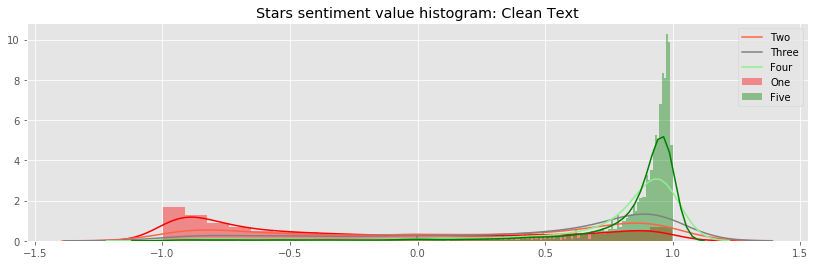

In [13]:
plt.figure(figsize=(14,4))
sns.distplot(clean[clean.stars==1]['compound'],bins='auto',label='One',color='red',hist=True)
sns.distplot(clean[clean.stars==2]['compound'],bins='auto',label='Two',color='tomato',hist=False)
sns.distplot(clean[clean.stars==3]['compound'],bins='auto',label='Three',color='gray',hist=False)
sns.distplot(clean[clean.stars==4]['compound'],bins='auto',label='Four',color='lightgreen',hist=False)
sns.distplot(clean[clean.stars==5]['compound'],bins='auto',label='Five',color='green',hist=True)
plt.xlabel('')
plt.legend()
plt.title('Stars sentiment value histogram: Clean Text')
plt.show()

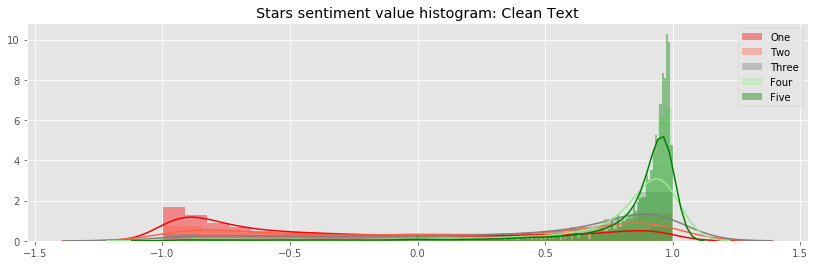

In [14]:
plt.figure(figsize=(14,4))
sns.distplot(clean[clean.stars==1]['compound'],bins='auto',label='One',color='red',hist=True)
sns.distplot(clean[clean.stars==2]['compound'],bins='auto',label='Two',color='tomato',hist=True)
sns.distplot(clean[clean.stars==3]['compound'],bins='auto',label='Three',color='gray',hist=True)
sns.distplot(clean[clean.stars==4]['compound'],bins='auto',label='Four',color='lightgreen',hist=True)
sns.distplot(clean[clean.stars==5]['compound'],bins='auto',label='Five',color='green',hist=True)
plt.xlabel('')
plt.legend()
plt.title('Stars sentiment value histogram: Clean Text')
plt.show()

## Lets focous only on One & Five stars for simplification¶


In [15]:
og = original.ix[np.where((original.stars==1)|(original.stars==5))]
og = og.reset_index(drop=True)

In [16]:
cl = clean.ix[np.where((clean.stars==1)|(clean.stars==5))]
cl = cl.reset_index(drop=True)

## Plot

## compare distribution of sentiment value between original text & clean up text

In [17]:
one_og = og[og.stars == 1]
five_og = og[og.stars == 5]

one_cl = cl[cl.stars == 1]
five_cl = cl[cl.stars == 5]

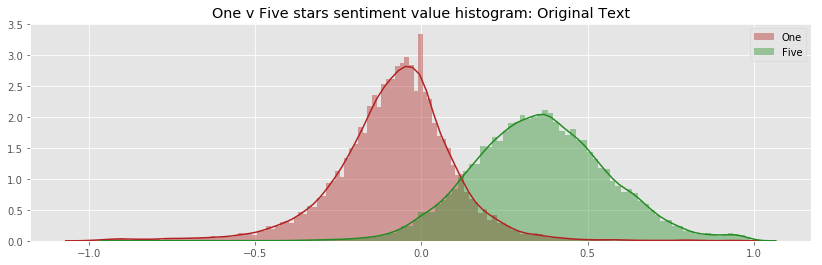

In [18]:
plt.figure(figsize=(14,4))
sns.distplot(one_og['compound'],bins='auto',label='One',color='firebrick',hist=True)
sns.distplot(five_og['compound'],bins='auto',label='Five', color= 'forestgreen',hist=True)
plt.xlabel('')
plt.legend()
plt.title('One v Five stars sentiment value histogram: Original Text')
plt.show()

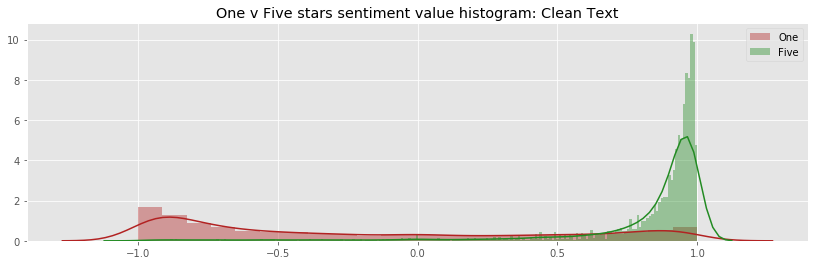

In [19]:
plt.figure(figsize=(14,4))
sns.distplot(one_cl['compound'],bins='auto',label='One',color='firebrick',hist=True)
sns.distplot(five_cl['compound'],bins='auto',label='Five', color= 'forestgreen',hist=True)
plt.xlabel('')
plt.legend()
plt.title('One v Five stars sentiment value histogram: Clean Text')
plt.show()

## Compare distribution of One star sentiment value original text & One star sentiment value clean text

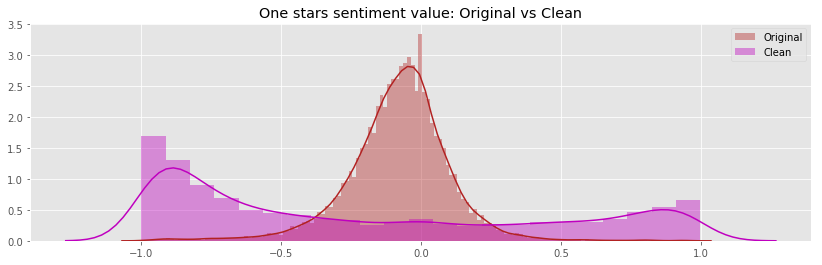

In [20]:
plt.figure(figsize=(14,4))
sns.distplot(one_og['compound'],bins='auto',label='Original', color= 'firebrick',hist=True)
sns.distplot(one_cl['compound'],bins='auto',label='Clean',color='m',hist=True)
plt.xlabel('')
plt.legend()
plt.title('One stars sentiment value: Original vs Clean')
plt.show()

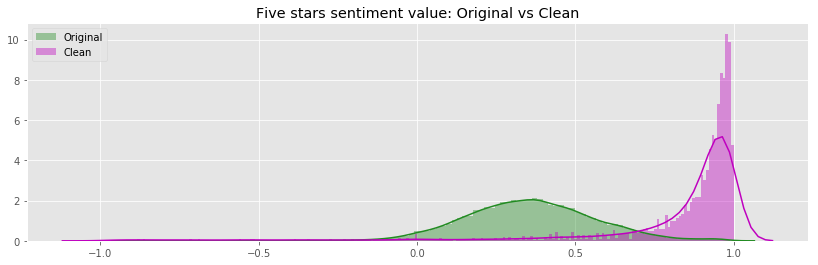

In [21]:
plt.figure(figsize=(14,4))
sns.distplot(five_og['compound'],bins='auto',label='Original', color= 'forestgreen',hist=True)
sns.distplot(five_cl['compound'],bins='auto',label='Clean',color='m',hist=True)
plt.xlabel('')
plt.legend()
plt.title('Five stars sentiment value: Original vs Clean')
plt.show()

# compare neg neutral positive values

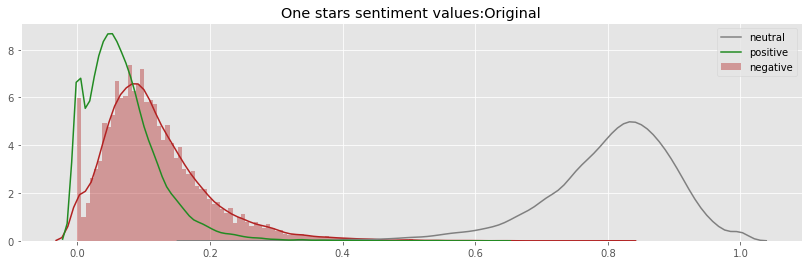

In [22]:
plt.figure(figsize=(14,4))
sns.distplot(one_og['neg'],bins='auto',label='negative',color='firebrick',hist=True)
sns.distplot(one_og['neu'],bins='auto',label='neutral', color= 'gray',hist=False)
sns.distplot(one_og['pos'],bins='auto',label='positive',color='forestgreen',hist=False)
plt.xlabel('')
plt.legend()
plt.title('One stars sentiment values:Original')
plt.show()

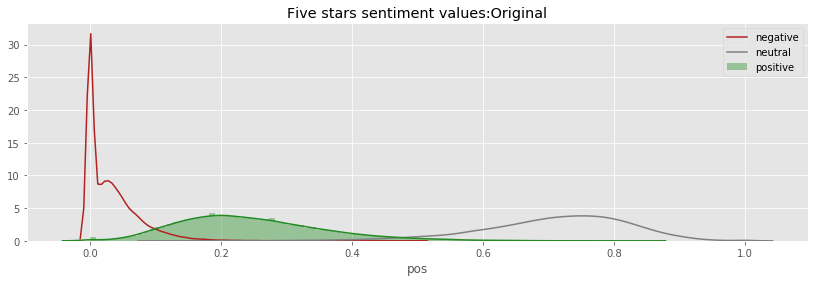

In [23]:
plt.figure(figsize=(14,4))
sns.distplot(five_og['neg'],bins='auto',label='negative',color='firebrick',hist=False)
sns.distplot(five_og['neu'],bins='auto',label='neutral', color= 'gray',hist=False)
sns.distplot(five_og['pos'],bins='auto',label='positive',color='forestgreen',hist=True)
plt.legend()
plt.title('Five stars sentiment values:Original')
plt.show()

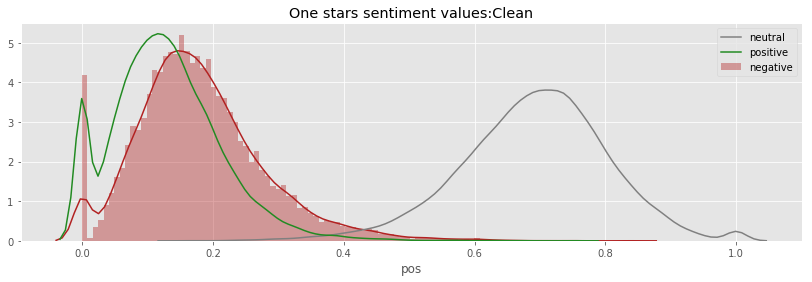

In [24]:
plt.figure(figsize=(14,4))
sns.distplot(one_cl['neg'],bins='auto',label='negative',color='firebrick',hist=True)
sns.distplot(one_cl['neu'],bins='auto',label='neutral', color= 'gray',hist=False)
sns.distplot(one_cl['pos'],bins='auto',label='positive',color='forestgreen',hist=False)
plt.legend()
plt.title('One stars sentiment values:Clean')
plt.show()

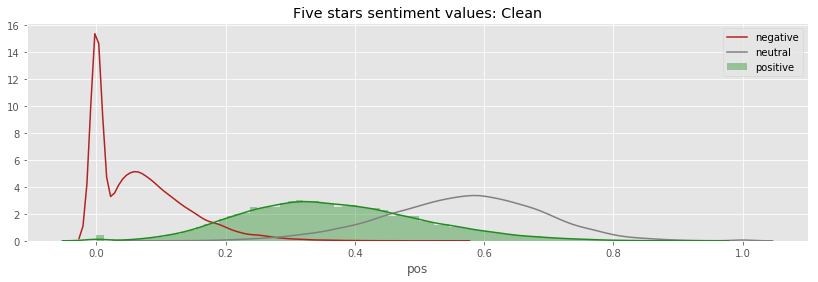

In [25]:
plt.figure(figsize=(14,4))
sns.distplot(five_cl['neg'],bins='auto',label='negative',color='firebrick',hist=False)
sns.distplot(five_cl['neu'],bins='auto',label='neutral', color= 'gray',hist=False)
sns.distplot(five_cl['pos'],bins='auto',label='positive',color='forestgreen',hist=True)
plt.legend()
plt.title('Five stars sentiment values: Clean')
plt.show()

NameError: name 'ogg' is not defined

In [28]:
ogg = original.ix[np.where((original.stars==1)|(original.stars==5))]
ogg = ogg.reset_index(drop=True)

In [29]:
cll = clean.ix[np.where((clean.stars==1)|(clean.stars==5))]
cll = cll.reset_index(drop=True)

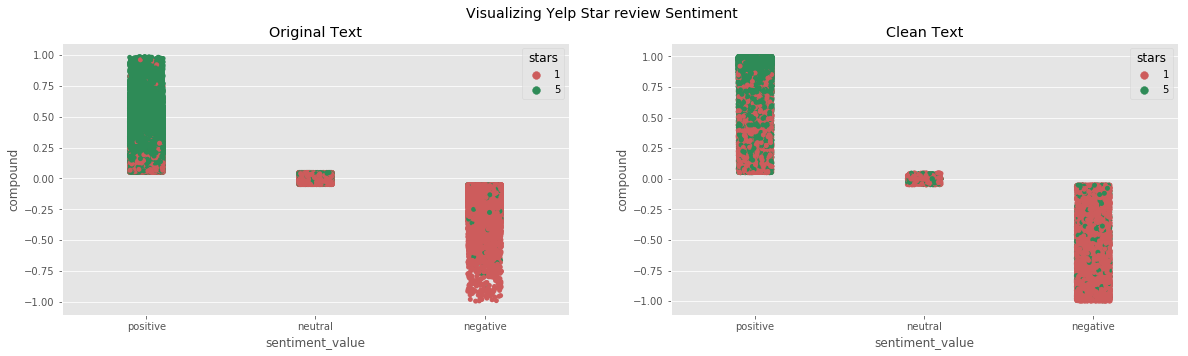

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sp = sns.stripplot(x='sentiment_value', y="compound", order = ['positive','neutral','negative'],
                   palette={1: "indianred", 
                             5: "seagreen"},
                   hue='stars', data=ogg, ax=ax1)
ax1.set_title('Original Text')

sp2 = sns.stripplot(x='sentiment_value', y="compound", 
                    order = ['positive','neutral','negative'],
                    palette={1: "indianred", 
                             5: "seagreen"},
                   hue='stars', data=cll, ax=ax2)
ax2.set_title('Clean Text')

t = f.suptitle('Visualizing Yelp Star review Sentiment', fontsize=14)

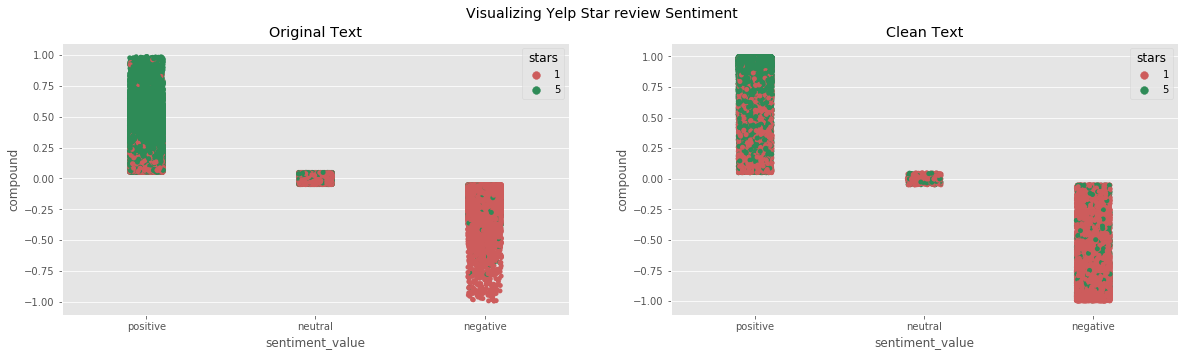

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sp = sns.stripplot(x='sentiment_value', y="compound", order = ['positive','neutral','negative'],
                   palette={1: "indianred", 
                             5: "seagreen"},
                   hue='stars', data=ogg, ax=ax1)
ax1.set_title('Original Text')

sp2 = sns.stripplot(x='sentiment_value', y="compound", 
                    order = ['positive','neutral','negative'],
                    palette={1: "indianred", 
                             5: "seagreen"},
                   hue='stars', data=cll, ax=ax2)
ax2.set_title('Clean Text')

t = f.suptitle('Visualizing Yelp Star review Sentiment', fontsize=14)

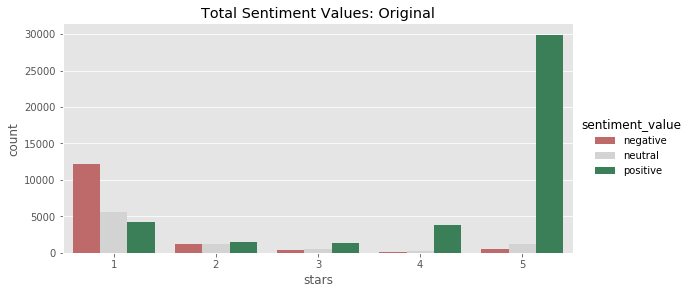

In [32]:
fc = sns.factorplot(x="stars", 
                    hue="sentiment_value", 
                    data=original, kind="count",size=4, aspect=2,legend=True,
                    palette={"negative": "indianred", 
                             "positive": "seagreen", 
                             "neutral": "lightgray"})
plt.title("Total Sentiment Values: Original")
plt.show()

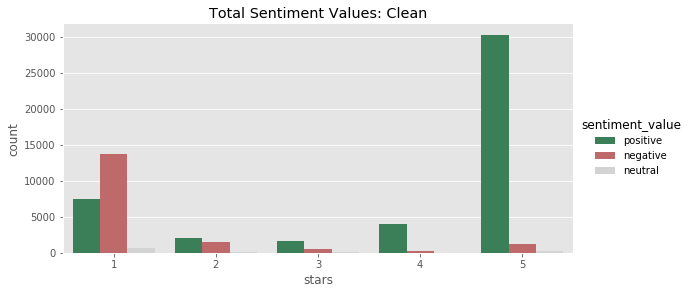

In [33]:
fc = sns.factorplot(x="stars", 
                    hue="sentiment_value", 
                    data=clean, kind="count",size=4, aspect=2,legend=True,
                    palette={"negative": "indianred", 
                             "positive": "seagreen", 
                             "neutral": "lightgray"})
plt.title("Total Sentiment Values: Clean")
plt.show()

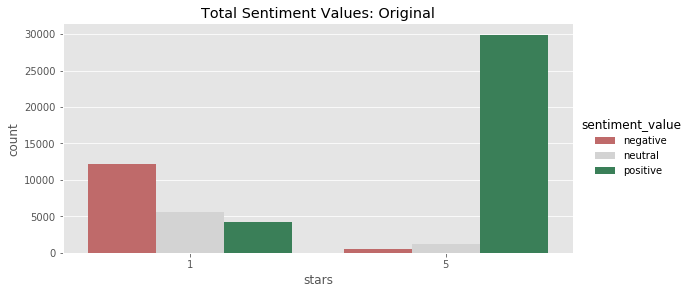

In [34]:
fc = sns.factorplot(x="stars", 
                    hue="sentiment_value", 
                    data=ogg, kind="count",size=4, aspect=2,legend=True,
                    palette={"negative": "indianred", 
                             "positive": "seagreen", 
                             "neutral": "lightgray"})
plt.title("Total Sentiment Values: Original")
plt.show()

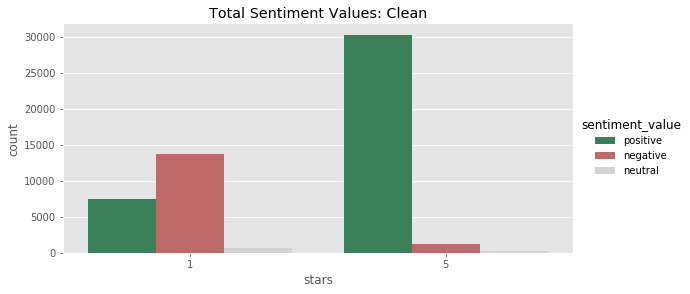

In [35]:
fc = sns.factorplot(x="stars", 
                    hue="sentiment_value", 
                    data=cll, kind="count",size=4, aspect=2,legend=True,
                    palette={"negative": "indianred", 
                             "positive": "seagreen", 
                             "neutral": "lightgray"})
plt.title("Total Sentiment Values: Clean")
plt.show()

In [40]:
original.head()

,review_id,stars,text,compound,neg,neu,pos,sentiment_value
0,TNNkSmMfshsD3G60jTNjDA,1,Please stay away from this place if you can! I...,-0.067,0.154,0.730,0.116,negative
1,v-iKdstPdCxJr8zV1ZMdrw,5,My husband has been a patient of Dr. Byrne for...,-0.022,0.081,0.773,0.146,neutral
2,BmNDRCV9_NzQ_KCChyfdEw,4,Dr. Byrne is a great doctor! She has great bed...,0.335,0.060,0.705,0.235,positive
3,t_TKVMxKFYm9Hl-TIO7UUw,3,I'm raising my review as Dr Bryne's has been m...,0.108,0.072,0.852,0.076,positive
4,NWRrpGRgWZBBj3lvCZGVKA,1,I wish I could give 0 stars. Worst office I've...,-0.139,0.128,0.791,0.082,negative


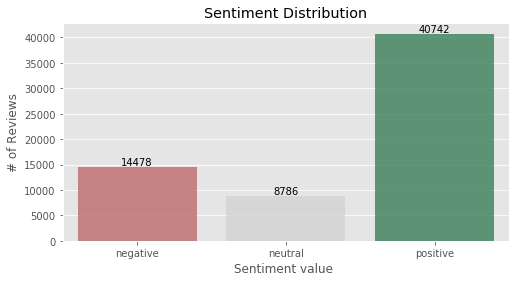

In [46]:
#Get the distribution of the ratings
x=original['sentiment_value'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8,
                                   palette={"negative": "indianred", 
                             "positive": "seagreen", 
                             "neutral": "lightgray"})
plt.title("Sentiment Distribution")
plt.ylabel('# of Reviews', fontsize=12)
plt.xlabel('Sentiment value ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [36]:
original.to_csv('yelp_data/sent_text_final.csv')

In [37]:
clean.to_csv('yelp_data/sent_text_clean_final.csv')

In [38]:
ls yelp_data/

health_raw00.csv*           sent_text_clean.csv*        sent_text.csv*
health_text_sentiment.csv*  sent_text_clean_final.csv*  sent_text_final.csv*


## Result


- clean text gives false results base on star value
- for sentiment value, keep original text